# Neural Networks for Classification

In this notebook we are going to explore the use of Neural Networks for image classification. We are going to use a dataset of small images of clothes and accessories, the Fashion MNIST. You can find more information regarding the dataset here: https://pravarmahajan.github.io/fashion/

Each instance in the dataset consist of an image, in a format similar to the digit images you have seen in the previous homework, and a label. The labels correspond to the type of clothing, as follows:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Let's first load the required packages.

In [ ]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

The following is a function to load the data, that we are going to use later in the notebook.

In [ ]:
# helper function to load Fashion MNIST dataset from disk
def load_fashion_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

University ID will be used as seed for random generator. Change the ID number in case you observe unexpected behaviours and want to test if this is due to randomization (e.g., train/test split). If you change the ID number explain why you have change it.

In [ ]:
ID = 2019157 #my university ID 
np.random.seed(ID)

Now we load the dataset using the function above.

In [ ]:
#load the fashion MNIST dataset and normalize the features so that each value is in [0,1]
X, y = load_fashion_mnist("data")
# rescale the data
X = X / 255.0

Now we split the data into training and test. Make sure that each label is present at least 10 times
in the training set.

In [ ]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rest as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [46 53 53 46 49 62 55 44 51 41]


The following function plots an image and the corresponding label, to be used to inspect the data when needed.

In [ ]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

Now let's test the function above and check few images.

INPUT:


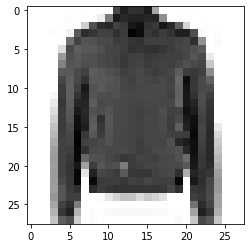

LABEL: 4
INPUT:


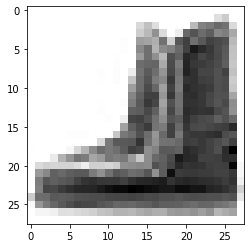

LABEL: 9
INPUT:


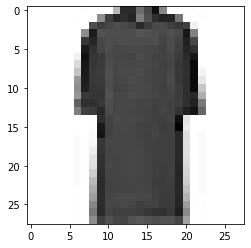

LABEL: 3


In [ ]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,300)

## Exercize 1

Now use a (feed-forward) Neural Network for prediction. Use the multi-layer perceptron (MLP) classifier MLPClassifier(...) in scikit-learn, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization parameter for L2 regularization that is used by the MLP in sklearn.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. You can evaluate the architectures you chose using the GridSearchCV with a 5-fold cross-validation, and use the results to pick the best architecture. The code below provides some architectures you can use, but you can choose other ones if you prefer.


In [ ]:
#function to print a dictionary in a formatted way
def print_dicitonary(dict1):
    for name, score in dict1.items():
        print("{:<24} {}".format(name, score))
    return

In [ ]:
#MLPclassifier requires in input the parameter hidden_layer_sizes, that is a tuple specifying the number of 
#neurons in the hidden layers; for example: (10,) means that there is only 1 hidden layer with 10 neurons; 
#(10,50) means that there are 2 hidden layers, the first with 10 neurons, the second with 50 neurons

#these are examples of possible architectures you can test, but feel free to use different architectures! 
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_cv = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID)  

clf = GridSearchCV(mlp_cv, hl_parameters)
clf.fit(X_train, y_train)
print ('RESULTS FOR NN')
print("Best parameters set found: ",clf.best_params_)
print("Score with best parameters: ",clf.best_score_)
print("All scores on the grid:")
print_dicitonary(clf.cv_results_)

RESULTS FOR NN
Best parameters set found:  {'hidden_layer_sizes': (50,)}
Score with best parameters:  0.7700000000000001
All scores on the grid:
mean_fit_time            [1.18340178 1.54445915 0.32195792 1.00858541]
std_fit_time             [0.41897079 0.05222742 0.16103338 0.26681025]
mean_score_time          [0.00320077 0.         0.         0.00364099]
std_score_time           [0.00392013 0.         0.         0.00368692]
param_hidden_layer_sizes [(10,) (50,) (10, 10) (50, 50)]
params                   [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}]
split0_test_score        [0.7  0.73 0.45 0.76]
split1_test_score        [0.74 0.75 0.39 0.81]
split2_test_score        [0.81 0.8  0.55 0.82]
split3_test_score        [0.75 0.78 0.69 0.8 ]
split4_test_score        [0.76 0.79 0.57 0.59]
mean_test_score          [0.752 0.77  0.53  0.756]
std_test_score           [0.03544009 0.02607681 0.10353743 0.08546344]
r

## Exercize 2

What do you observe for different architectures and their scores? How do the number of layers and their sizes affect the performances?

As we can see from the results the best NN are:
1. one hidden layer with 50 neurons            mean score:  0.77
2. two hidden layers with 50 neurons each      mean score:  0.756
3. one hidden layer with 10 neurons            mean score:  0.752
4. two hidden layers with 10 neurons each      mean score:  0.53

Adding neurons on hidden layers you reach better scores.
We can observe that, with this samples and features, adding only one layer doesn't allow you to perform better

## Exercize 3

Now get training and test error (according to the initial split) for a NN with best parameters chosen from the cross-validation above (and learning the NN weights from the entire training set). Use verbose=True
in input so to see how loss changes in iterations. (Note that the loss used by the MLPclassifier may be different from the 0-1 loss, also called *accuracy*.)

In [ ]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=(50,),verbose='true',max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID).fit(X_train, y_train)  

training_error = 1. - mlp.score(X_train,y_train)
test_error = 1. - mlp.score(X_test,y_test)

print ('\nRESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.32108346
Iteration 2, loss = 1.56594989
Iteration 3, loss = 1.36577929
Iteration 4, loss = 0.99782773
Iteration 5, loss = 0.85890960
Iteration 6, loss = 0.76188287
Iteration 7, loss = 0.85756419
Iteration 8, loss = 0.60206587
Iteration 9, loss = 0.54980136
Iteration 10, loss = 0.48515193
Iteration 11, loss = 0.46863238
Iteration 12, loss = 0.41661047
Iteration 13, loss = 0.39891669
Iteration 14, loss = 0.39407181
Iteration 15, loss = 0.33953487
Iteration 16, loss = 0.32280414
Iteration 17, loss = 0.38168754
Iteration 18, loss = 0.31447142
Iteration 19, loss = 0.27714903
Iteration 20, loss = 0.27343026
Iteration 21, loss = 0.21348693
Iteration 22, loss = 0.19597487
Iteration 23, loss = 0.17812299
Iteration 24, loss = 0.16805312
Iteration 25, loss = 0.19064897
Iteration 26, loss = 0.18204192
Iteration 27, loss = 0.17785367
Iteration 28, loss = 0.24848981
Iteration 29, loss = 0.12197219
Iteration 30, loss = 0.12557686
Iteration 31, loss = 0.11358131
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [ ]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 994, 1030,  948,  985,  995, 1039,  991,  923, 1076, 1019],
       dtype=int64))

## Exercize 4

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. You can use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [ ]:
#for NN we try the same architectures as before
hl_parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp_large_cv = MLPClassifier(max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID)  

clf_large = GridSearchCV(mlp_cv, hl_parameters)
clf_large.fit(X_train, y_train)
print ('RESULTS FOR NN')
print("Best parameters set found: ",clf_large.best_params_)
print("Score with best parameters: ",clf_large.best_score_)
print("All scores on the grid:")
print_dicitonary(clf_large.cv_results_)

RESULTS FOR NN
Best parameters set found:  {'hidden_layer_sizes': (50,)}
Score with best parameters:  0.8504999999999999
All scores on the grid:
mean_fit_time            [16.61779027 29.58641496 12.93027425 23.10586095]
std_fit_time             [3.24977878 3.81869298 3.70920944 4.8701015 ]
mean_score_time          [0.00952621 0.01604433 0.00800247 0.02233977]
std_score_time           [5.90839621e-03 3.07390159e-04 2.33309361e-06 5.77117698e-03]
param_hidden_layer_sizes [(10,) (50,) (10, 10) (50, 50)]
params                   [{'hidden_layer_sizes': (10,)}, {'hidden_layer_sizes': (50,)}, {'hidden_layer_sizes': (10, 10)}, {'hidden_layer_sizes': (50, 50)}]
split0_test_score        [0.8155 0.8485 0.832  0.851 ]
split1_test_score        [0.8235 0.8575 0.835  0.8425]
split2_test_score        [0.8225 0.8455 0.8175 0.83  ]
split3_test_score        [0.813  0.8405 0.8215 0.832 ]
split4_test_score        [0.818  0.8605 0.835  0.859 ]
mean_test_score          [0.8185 0.8505 0.8282 0.8429]
std_test

## Exercize 5
Describe your architecture choices and the results you observe with respect to the architectures you used.

I decide to try with the same different architectures as above so I can compare the results.
Using more data in the training set we can see that every NN of Exercize 4 performs better than the ones on Exercize 1.  
The results are (Mean test score):
1. one hidden layer with 50 neurons            mean score:  0.8505
2. two hidden layers with 50 neurons each      mean score:  0.8429
3. two hidden layers with 10 neurons each      mean score:  0.8282
4. one hidden layer with 10 neurons            mean score:  0.8185

As before the one that performs best is the one with only one layer with more neurons.

## Exercize 6

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations if you cannot run for 300 iterations. 


In [ ]:
#get training and test error for the best NN model from CV
best_mlp_large = MLPClassifier(hidden_layer_sizes=(50,),max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1,random_state=ID).fit(X_train, y_train)  

#get the training and test error
training_error = 1. - best_mlp_large.score(X_train,y_train)
test_error = 1. - best_mlp_large.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.145660


## Exercize 7

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

10000 points:
1. Best architecture: 1 hidden layer with 50 neurons
2. Best NN training error: 0.000000
3. Best NN test error: 0.145660


500 points:
1. Best architecture: 1 hidden layer with 50 neurons
2. Best NN training error: 0.000000
3. Best NN test error: 0.210689

We can see that using more data we reach a better performance without overfitting with the same architecture.

## Exercize 8

Plot an image that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

2 
SVM label correctly classified:  6
Index:  10
INPUT:


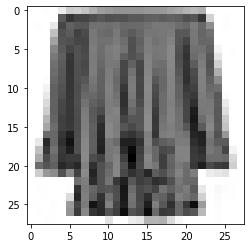

LABEL: 6


In [ ]:
y_test_predicted_10000=best_mlp_large.predict(X_test)
y_test_predicted_500=mlp.predict(X_test)
for i in range(0,len(y_test)):
    if y_test_predicted_500[i]!=y_test[i] :
        if y_test_predicted_10000[i]==y_test[i] :
            print(y_test_predicted_500[i],"\nSVM label correctly classified: ",y_test_predicted_10000[i])
            print("Index: ",i)
            plot_input(X_test,y_test,i)
            break

Let's plot some of the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 10000 data points. The code below plots the weights in a matrix form, where a figure represents all the weights of the edges entering in a hidden node. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large": you may need to replace such variables with your variable names. 



Weights with 500 data points:


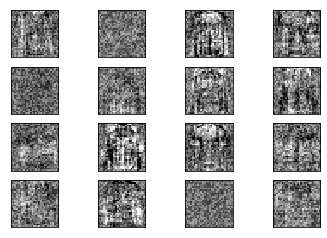

Weights with 10000 data points:


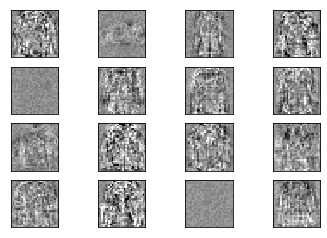

In [ ]:
print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## Exercize 9

Describe what do you observe by looking at the weights:

By looking at the weights we can see that using 10000 data we have more similar weigths than the ones obtained with 500 samples.

## Exercize 10

Pick another classifier among the ones we have seen previously (SVM or something else). Report the training and test error for such classifier with 10000 samples in the training set, if possible; if the classifier cannot run with so many data sample reduce the number of samples.

*Note*: if there are parameters to be optimized use cross-validation. If you choose SVM, you can decide if you want to use a single kernel or use the best among many; in the latter case, you need to pick the best kernel using cross-validation (using the functions available in sklearn).

**[I decide to use logistic regression using max_iter=2000 in order to reach convergence.]**

In [ ]:
# ADD YOUR CODE
from sklearn import linear_model

lr = linear_model.LogisticRegression(max_iter=2000)
# fit the model on the training data
lr.fit(X_train, y_train)

#compute training and test error for model above
training_error_other = 1. - lr.score(X_train,y_train)
test_error_other =1. -  lr.score(X_test,y_test)

print ('RESULTS FOR OTHER CLASSIFIER\n')
print ("Best training error (other model): %f" % training_error_other)
print ("Best test error (other model): %f" % test_error_other)

RESULTS FOR OTHER CLASSIFIER

Best training error (other model): 0.067800
Best test error (other model): 0.167680


## Exercize 11
Compare the results of NN and of the other classifier you have chosen above. Which classifier would you preferer? Provide a brief explanation.

We can see that in this case the NN performs better than logistic regression in both training and test.
I would prefer using NN for the scores obtained even if more time is needed for thei training

# Clustering with K-means

Clustering is a useful technique for *unsupervised* learning. We are now going to cluster 2000 images in the fashion MNIST dataset, and try to understand if the clusters we obtain correspond to the true labels.

In [ ]:
#load the required packages
from sklearn import metrics
from sklearn.cluster import KMeans

(Note that the code below assumes that the data has already been transformed as in the NN part of the notebook, so make sure to run the code for the transformation even if you do not complete the part on NN.)

In [ ]:
#let's consider only 2000 data points
X = X[permutation]
y = y[permutation]

m_training = 2000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

## Exercize 1
Cluster the points using the KMeans() and fit() functions (see the userguide for details). For Kmeans, set: n_clusters=10 as number of clusters; n_init=10 as the number of times the algorithm will be run with different centroid seeds; random_state = ID. You can use the default setting for the other parameters.

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=ID).fit(X_train)
y_train_predicted=kmeans.predict(X_train)
y_test_predicted=kmeans.predict(X_test)

## Comparison of clusters with true labels

## Exercize 2
Now compare the obtained clusters with the true labels, using the function sklearn.metrics.cluster.contingency_matrix() (see the userguide for details). The function prints a matrix $A$ such that entry $A_{i,j}$ is is the number of samples in true class $i$ and in predicted class $j$.

In [ ]:
# compute and print the contingency matrix for the true labels vs the clustering assignments
Atrain=sklearn.metrics.cluster.contingency_matrix(y_train, y_train_predicted, eps=None, sparse=False)
Atest=sklearn.metrics.cluster.contingency_matrix(y_test, y_test_predicted, eps=None, sparse=False)
print("A train:\n",Atrain)
print("A test:\n",Atest)

A train:
 [[  2   2   3   0  16 112   1   0  67   0]
 [  0   0   2 184  10   5   1   0   8   0]
 [  2  10 102   0   2   3   0   0  71   0]
 [  1   6   1   5 147  12   0   0  33   0]
 [  2   3 135   0  17  10   2   0  25   0]
 [  1 153   0   0   0   0   0  41   0  17]
 [  2   6  71   1   9  38   3   0  70   0]
 [  0  31   0   0   0   0   0 153   0   3]
 [ 72  15   7   0   0   1  85  22  10   0]
 [  0   6   0   0   0   0   2  28   2 149]]
A test:
 [[  31  189  141    5  526 3129   21    3 1752    0]
 [   0   47   70 4979  302  110    2    0  280    0]
 [  43  187 3687    0   38   92   31    4 1728    0]
 [   6  133   57  146 3775  508    2    0 1167    1]
 [  35   92 3776    7  519  427   12    0  938    0]
 [  12 3987    0    0    7    0    7 1253   77  445]
 [  23  322 2028    2  261  938   63    9 2152    2]
 [   0  841    0    0    0    0    4 4769    1  198]
 [2368  260  257    2   54   20 2015  381  423    8]
 [   3  173   10    0   14    2    5  886   57 4663]]


## Exercize 3
Based on the matrix shown above, comment on the results of clustering in terms of adherence to the true labels.


The matrix is not diagonal so we can undestand that the label predicted is different from the true label.
In addiction in the same row (or column) we can find different high numbers, this demonstrates a general bad prediction. 

## Choice of k with silhoutte coefficient
In many real applications it is unclear what is the correct value of $k$ to use. In practice one tries different values of $k$ and then uses some external score to choose a value of $k$. One such score is the silhoutte coefficient, that can be computed with metrics.silhouette_score(). See the definition of the silhoutte coefficient in the userguide.

## Exercize 4
Compute the clustering for k=2,3,...,15 (other parameters as above) and print the silhoutte coefficient for each such clustering.

In [ ]:
#run k-means with 10 choices of initial centroids for a range of values of n_clusters
#Atrain=sklearn.metrics.cluster.contingency_matrix(y_train, y_train_predicted, eps=None, sparse=False)
print("TRAIN:")
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID).fit(X_train)
    y_train_predicted=kmeans.predict(X_train)
    silhouttescore =sklearn.metrics.silhouette_score(X_train, y_train_predicted,metric='euclidean', sample_size=None, random_state=None)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))
    
print("TEST:")
for i in range(2,16):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=ID).fit(X_train)
    y_test_predicted=kmeans.predict(X_test)
    silhouttescore =sklearn.metrics.silhouette_score(X_test, y_test_predicted,metric='euclidean', sample_size=None, random_state=None)
    print("Silhoutte coefficient for number of clusters="+str(i)+": "+str(silhouttescore))

TRAIN:
Silhoutte coefficient for number of clusters=2: 0.19218844745410116
Silhoutte coefficient for number of clusters=3: 0.19318552700684394
Silhoutte coefficient for number of clusters=4: 0.18648436750931824
Silhoutte coefficient for number of clusters=5: 0.16771506964988417
Silhoutte coefficient for number of clusters=6: 0.15544582617750774
Silhoutte coefficient for number of clusters=7: 0.16674838772511752
Silhoutte coefficient for number of clusters=8: 0.1541011947169928
Silhoutte coefficient for number of clusters=9: 0.15432860094961004
Silhoutte coefficient for number of clusters=10: 0.14874931895814794
Silhoutte coefficient for number of clusters=11: 0.1507628647056733
Silhoutte coefficient for number of clusters=12: 0.14011846182844995
Silhoutte coefficient for number of clusters=13: 0.13345524434227446
Silhoutte coefficient for number of clusters=14: 0.12504223578340048
Silhoutte coefficient for number of clusters=15: 0.12495412544381009
TEST:
Silhoutte coefficient for numbe

## Exercize 5

Based on the silhoutte score, which $k$ would you pick? Motivate your choice. Does your choice match what you know about the data? If yes, explain why you think this is the case; if no, explain what you think may be the reason.

The best is k=2.
This doesn't match with what i know about data because there are 10 label so I was Expecting best k=10.
After seeing the Silhoutte I think that the reason for these results can be that we have some outliers, different deviations of clusters (the dispersion is not uniform), not spherical shape of clusters.

1. Silhoutte coefficient k=2  ≃ 0.193
2. Silhoutte coefficient k=10 ≃ 0.145
3. Silhoutte coefficient k=15 ≃ 0.12